# CHAPTER22 CNN을 이용한 이미지 인식 응용

## 22.1 데이터 부풀리기

### 22.1.1 ImageDataGenerator

- 이미지 데이터가 부족할 경우 이미지를 변형시켜 데이터를 늘리기도 한다



```
datagen = ImageDataGenerator(
          rotation_range=0,   - 회전하는 범위
          width_shift_range=0,  - 수평 이동하는 범위(이미지 가로폭에 대한 비율)
          height_shift_range=0,  - 수직 이동하는 범위(이미지 세로폭에 대한 비율)
          shear_range=0,  - 전단 범위. 크게 하면 더 비스듬히 찌그러진 이미지가 됨
          zoom_range=0,  - 이미지를 확대/축소시키는 비율 (최소:1-zoom_range, 최대:1+zoom_range)
          channel_shift_range=0, - 입력이 RGB 3채널인 이미지의 경우 각각에 임의의 값을 더하거나 뺄 수 있음
          horizontal_flip=False,  - 가로 반전
          vertical_flip=False  - 세로 반전
```



## 22.2 정규화

### 22.2.1 다양한 정규화 방법

- 정규화를 통해 학습효율을 높일 수 있다
- 딥러닝 정규화 방법에는 여러가지가 있다
  1. 배치 정규화(BN)
  2. 주성분 분석(PCA)
  3. 특이값 분해(SVD)
  4. 제로위상 성분 분석(ZCA)
  5. 국소 응답 정규화(LRN)
  6. 전역 콘트라스트 정규화(GCN)
  7. 국소 콘트라스트 정규화(LCN)

### 22.2.2 표준화

- 피쳐에 대해 평균을 0, 분산을 1로 하여 피쳐별 데이터 분포를 좁히는 방법

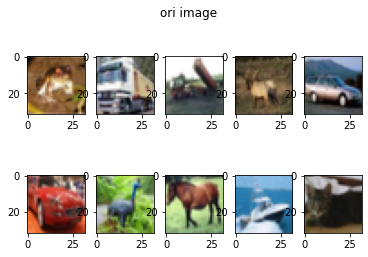

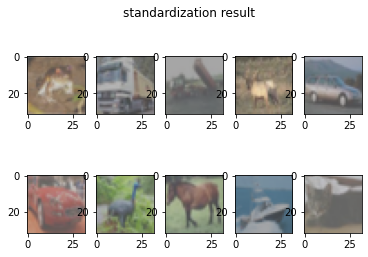

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
plt.suptitle('ori image', fontsize=12)
plt.show()

datagen = ImageDataGenerator(samplewise_center=True,
                             samplewise_std_normalization=True)  

g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max()) # 표준화를 이렇게....? 흠....
X_batch += 127.0 
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_batch[i])
plt.suptitle('standardization result', fontsize=12)
plt.show()

### 22.2.3 백색화

- 백색화는 데이터 성분 사이의 상관관계를 없애는 방법
- 백색화를 수행하면 전체적으로 어두워지고 가장자리가 강조된 것처럼 보이지만 백색화가 주위의 픽셀 정보로부터 쉽게 상정되는 색상은 무시하는 효과가 있기 때문이다
- 백색화로 정보량이 적은 면이나 배경 등이 아니라 정보량이 많은 가장자리 등을 강조함으로 학습 효율을 높일 수 있다

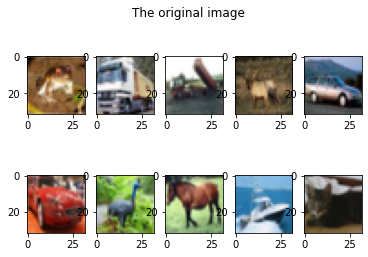

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1285: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


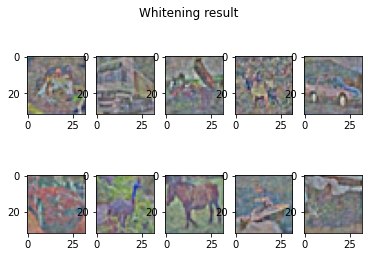

In [3]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

#-- load cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#-- Train:300 ,  Test:100
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# Generator - whitening
datagen = datagen = ImageDataGenerator(zca_whitening=True) # 제로위상 성분 분석
#
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

#
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

### 22.2.4 배치 정규화

- 미니배치 학습을 통해 배치마다 표준화를 수행하는 작업
- 배치 정규화는 데이터의 전처리뿐 아니라 중간층의 출력에도 적용가능하다
- 활성화 함수 등 출력값의 범위가 한정되지 않은 함수의 출력에 배치 정규화를 사용하면, 즉 활성화 함수 앞에 배치 정규화를 두면 학습이 원할하게 진행되어 큰 효과를 발휘한다

Epoch 1/3
10/10 [==============================] - 1s 53ms/step - loss: 2.4233 - accuracy: 0.1133 - val_loss: 2.3190 - val_accuracy: 0.1867
Epoch 2/3
10/10 [==============================] - 0s 34ms/step - loss: 2.2482 - accuracy: 0.2167 - val_loss: 2.2304 - val_accuracy: 0.2367
Epoch 3/3
10/10 [==============================] - 0s 34ms/step - loss: 2.1455 - accuracy: 0.3367 - val_loss: 2.1790 - val_accuracy: 0.2533


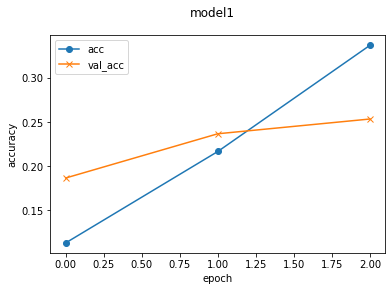

Epoch 1/3
10/10 [==============================] - 1s 55ms/step - loss: 1.7697 - accuracy: 0.4367 - val_loss: 10.8505 - val_accuracy: 0.1833
Epoch 2/3
10/10 [==============================] - 0s 36ms/step - loss: 1.1819 - accuracy: 0.6533 - val_loss: 24.5074 - val_accuracy: 0.1067
Epoch 3/3
10/10 [==============================] - 0s 41ms/step - loss: 0.6325 - accuracy: 0.8500 - val_loss: 2.7798 - val_accuracy: 0.4000


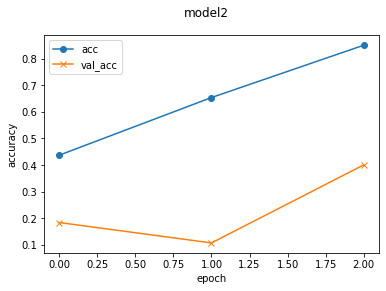

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1, 28, 28, 1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1, 28, 28, 1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]


# model1 - Bn 안쓴거 vs model2 - Bn 추가 성능 비교


#-- model1 define (active function: sigmoid) ----------------------------
model1 = Sequential()
model1.add(Conv2D(32,2, input_shape=(28, 28, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, 2, padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

#-- compile
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#-- training
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))
#-- visualization
plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.suptitle('model1', fontsize=12)
plt.show()


#-- model2 define (active function: ReLU) ---------------------------------
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
#-- add BN
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(Activation('relu'))
#-- add BN
model2.add(BatchNormalization())
model2.add(Dense(10))
model2.add(Activation('softmax'))

#-- compile
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#-- training
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

#-- visualization
plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.suptitle('model2', fontsize=12)
plt.show()

## 22.3 전이학습

- 대량의 데이터로 미리 학습되어 공개된 모델을 이용해 새로운 모델을 학습시키는 것을 전이학습이라 한다

### 22.3.1 VGG16

In [ ]:
from tensorflow import keras
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#-- define of input_tensor
input_tensor = Input(shape=(32, 32, 3))

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

model = keras.Model(inputs=vgg16.input, outputs=top_model)

for i in range(len(vgg16.layers)):
    vgg16.layers[i].trainable = False

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

#-- can be load pre-trained model
# model.load_weights('param_vgg.hdf5')

# batch:32, epoch:3
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

#-- save model parameter
model.save_weights('param_vgg.hdf5')

#-- accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#--
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

#-- predict
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)